<a href="https://colab.research.google.com/github/firmansyahr/Customer-Segmentation-Loyalty-Analytics/blob/main/Notebook/2_Hierarchy_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HIERARCHY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_data = pd.read_excel("/content/Transaksi Regional 3, 4, dan 5 2024.xlsx", sheet_name="Sheet1")

In [ ]:
df_data['Total Ton'] = pd.to_numeric(df_data['Total Ton'].astype(str).str.replace(',', '.'), errors='coerce')
df_data['Total Poin'] = pd.to_numeric(df_data['Total Poin'].astype(str).str.replace(',', '.'), errors='coerce')
df_data['Total Reward'] = df_data['Total Reward'].astype(str).str.replace('Rp', '', regex=False).str.replace('.', '', regex=False).str.strip()
df_data['Total Reward'] = pd.to_numeric(df_data['Total Reward'], errors='coerce')

df_data.dropna(subset=['Total Ton', 'Total Poin', 'Total Reward'], inplace=True)
agg = df_data.groupby('ID Toko').agg({
    'Total Ton': 'sum',
    'Total Poin': 'sum',
    'Total Reward': 'sum',
    'Regional': 'first',
    'Cluster': 'first'}).reset_index()
agg['Poin_Extra'] = agg['Total Poin'] - agg['Total Ton']
agg['Reward_per_Poin'] = agg['Total Reward'] / agg['Total Poin']
agg.replace([np.inf, -np.inf], np.nan, inplace=True)
agg.dropna(subset=['Poin_Extra', 'Reward_per_Poin'], inplace=True)
agg['Regional'] = agg['Regional'].astype(str)
encoder = OneHotEncoder(
    sparse_output=False,
    drop='first',
    categories=[['3', '4', '5']]
)
region_encoded = encoder.fit_transform(agg[['Regional']])
region_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(['Regional']))
agg_encoded = pd.concat([agg.reset_index(drop=True), region_df.reset_index(drop=True)], axis=1)
scaler = StandardScaler()
X = agg_encoded[['Total Ton', 'Poin_Extra', 'Regional_4', 'Regional_5']]
X_scaled = scaler.fit_transform(X)

=== HIERARCHICAL CLUSTERING ANALYSIS ===

Computing linkage matrix using ward method...
Plotting dendrogram...


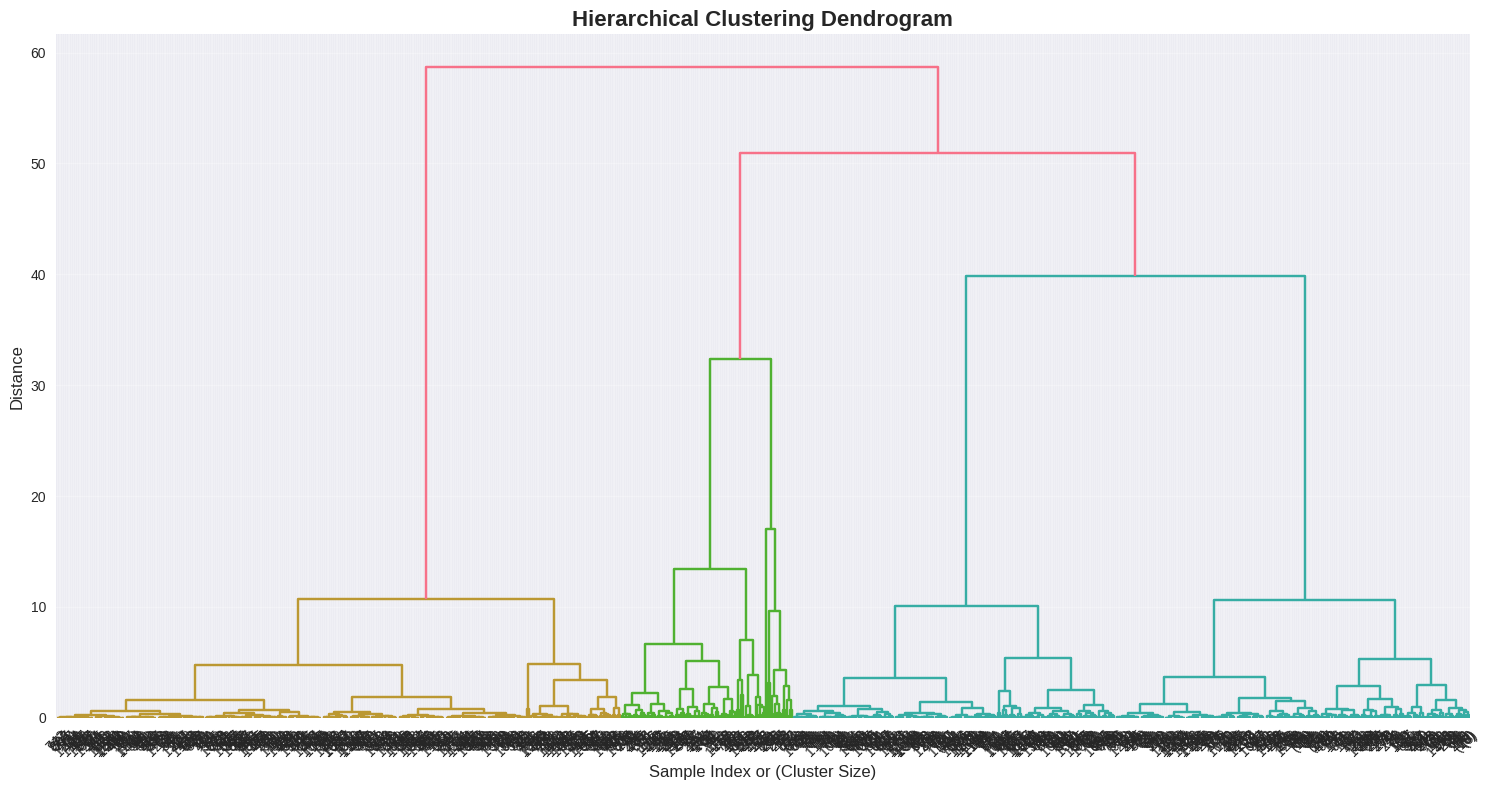


Analyzing silhouette scores...
Clusters:  2 | Silhouette Score: 0.5042
Clusters:  3 | Silhouette Score: 0.5697
Clusters:  4 | Silhouette Score: 0.7156
Clusters:  5 | Silhouette Score: 0.7313
Clusters:  6 | Silhouette Score: 0.7315
Clusters:  7 | Silhouette Score: 0.7271
Clusters:  8 | Silhouette Score: 0.6982
Clusters:  9 | Silhouette Score: 0.6361
Clusters: 10 | Silhouette Score: 0.5916

Plotting silhouette analysis...


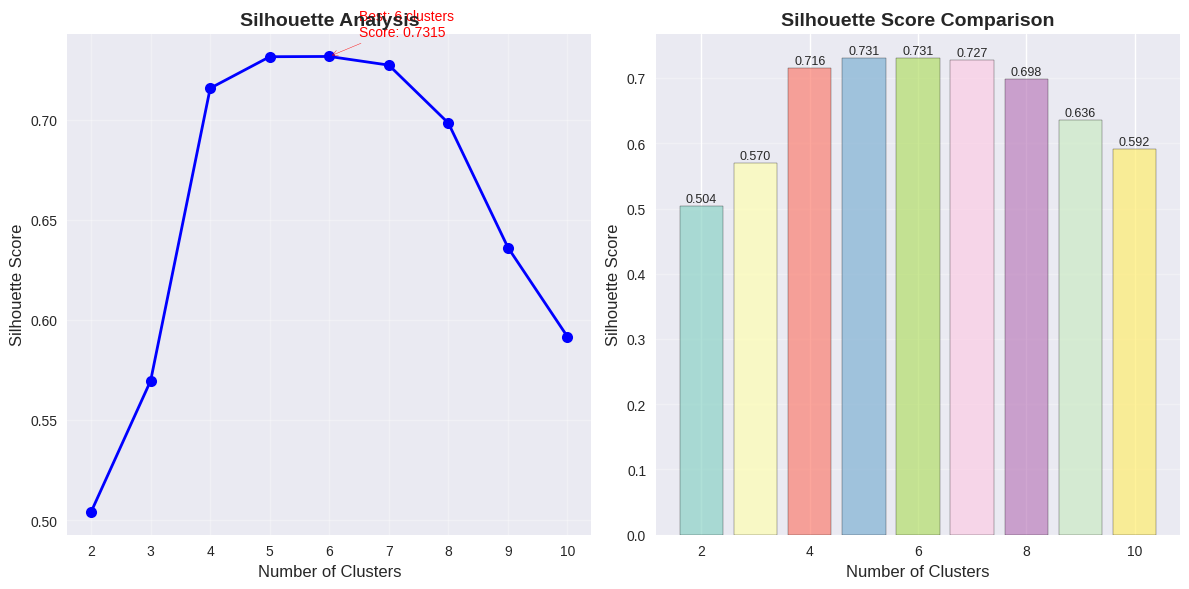


Best number of clusters based on silhouette score: 6


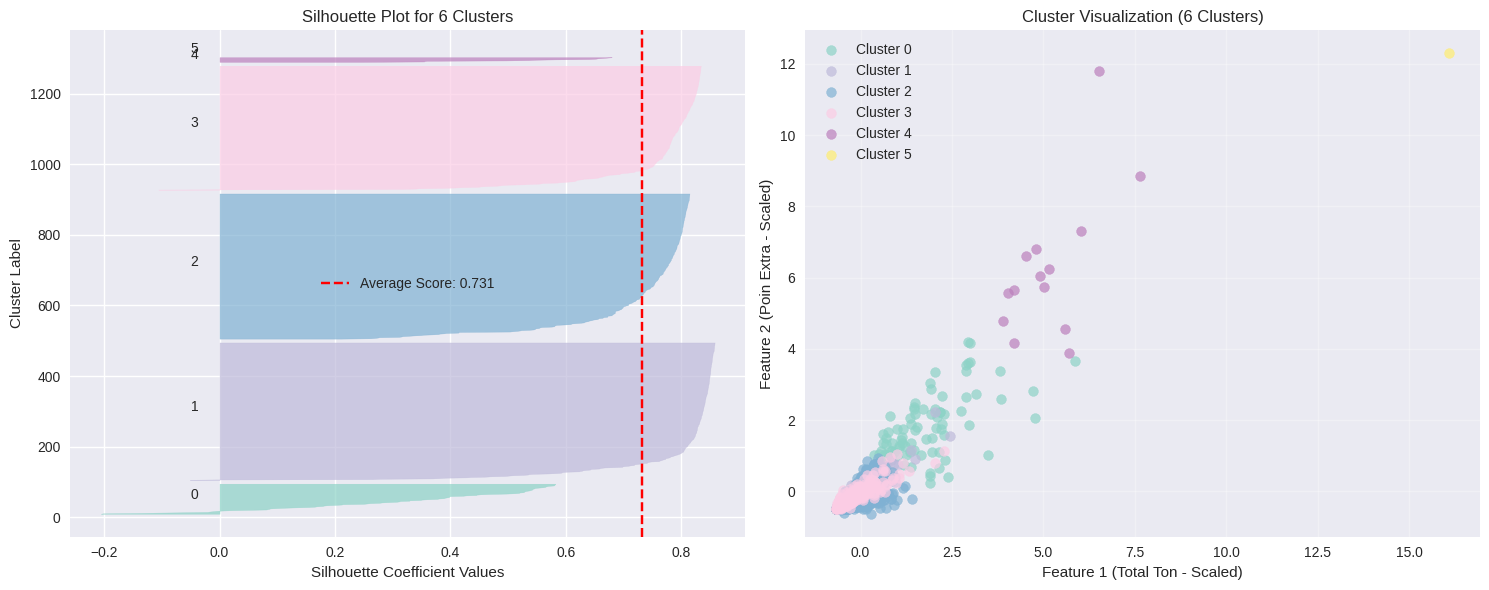



=== CLUSTER ANALYSIS FOR 5 CLUSTERS ===
Silhouette Score: 0.7313

Cluster Size Distribution:
Cluster 0:   15 stores (  1.2%)
Cluster 1:   86 stores (  6.9%)
Cluster 2:  412 stores ( 32.8%)
Cluster 3:  352 stores ( 28.0%)
Cluster 4:  390 stores ( 31.1%)

Cluster Characteristics (Mean Values):
        Total Ton          Poin_Extra         
             mean      std       mean      std
Cluster                                       
0        20263.14  9273.51   18634.24  6533.68
1         7609.51  3228.95    5892.16  2331.66
2         1864.65  1172.15     660.27   796.38
3         1398.71  1275.55     843.15   696.82
4         1074.92  1202.00     711.42   785.38

Regional Distribution by Cluster:
Regional      3      4      5
Cluster                      
0           0.0    0.0  100.0
1           2.3    2.3   95.3
2           0.0    0.0  100.0
3         100.0    0.0    0.0
4           0.0  100.0    0.0

Plotting cluster analysis for 5 clusters...


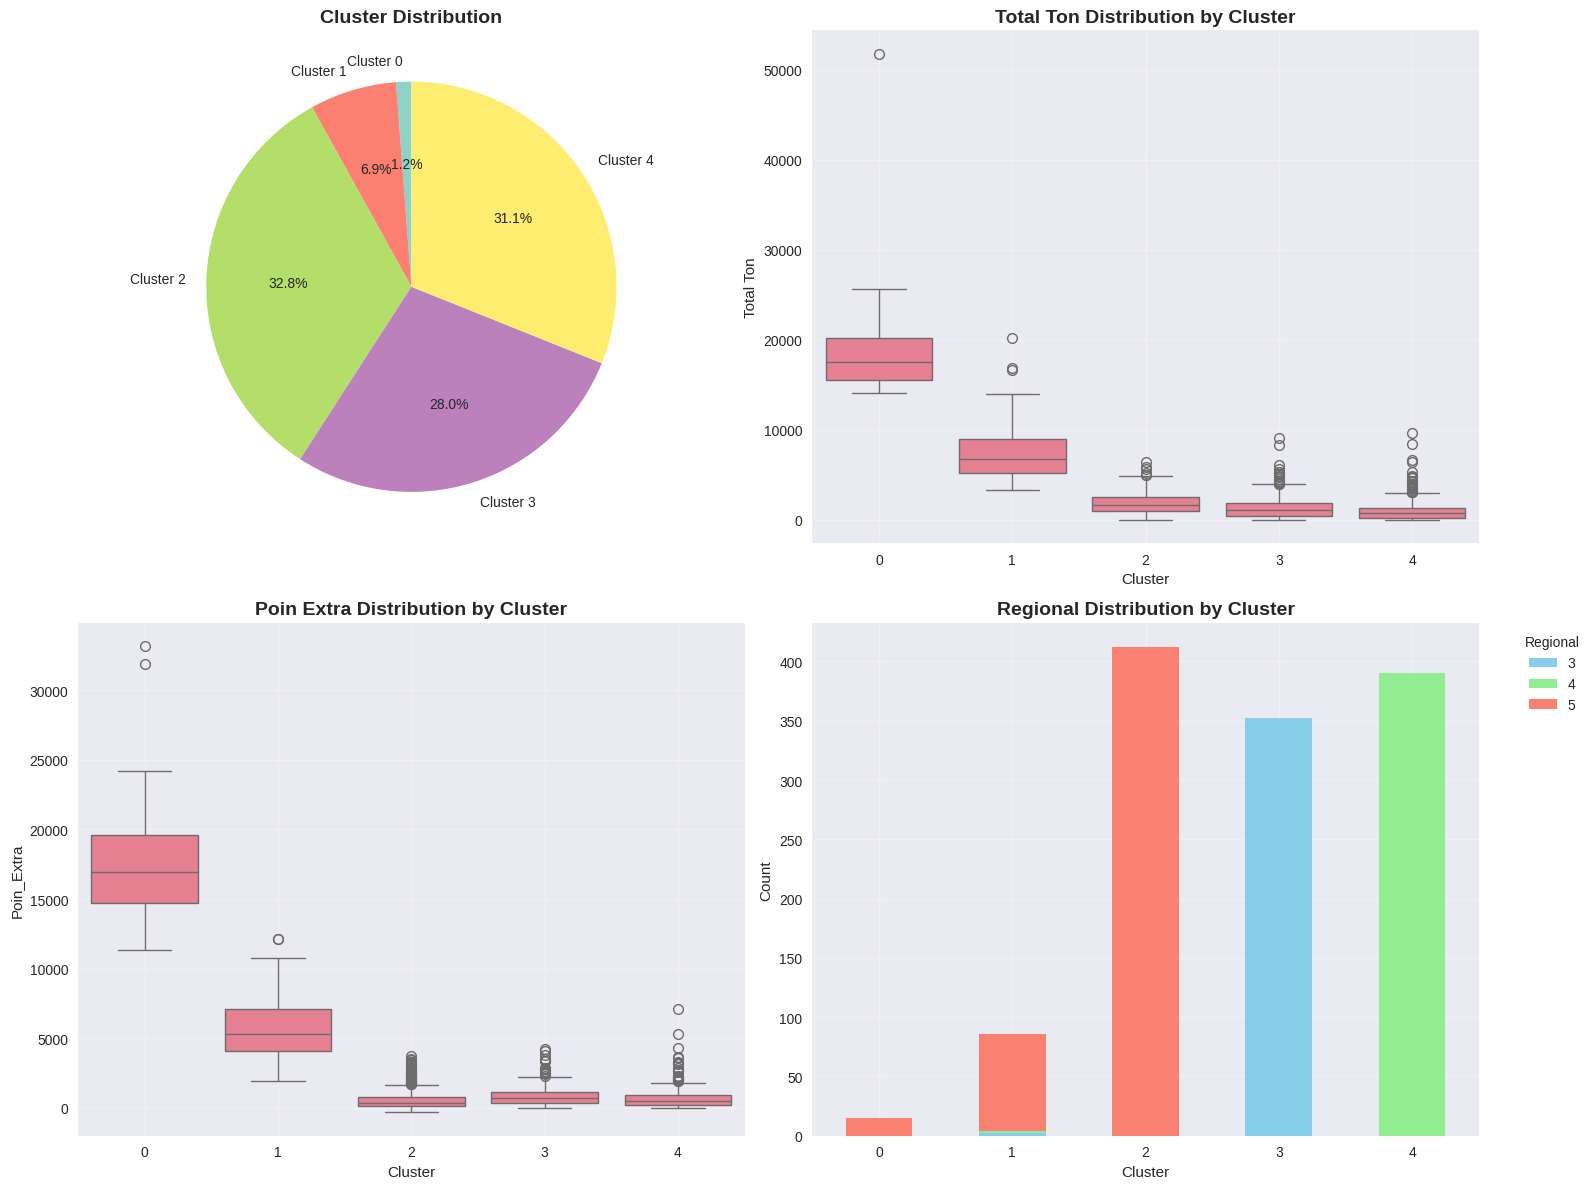


Final Result DataFrame (first 10 rows):
     ID_Toko  Total_Ton  Poin_Extra Region  Cluster
0  100000091     849.00       32.00      5        2
1  100000106    1472.26      404.90      5        2
2  100000108    1850.00      258.00      5        2
3  100000109    1906.72      198.00      5        2
4  100000110    1547.88      296.00      5        2
5  100000114    1835.40      435.60      5        2
6  100000135    1035.00      166.60      5        2
7  100000157    4478.40      938.20      5        2
8  100000218    3641.44     2090.32      5        2
9  100000221    2161.16      379.76      5        2

Final DataFrame Shape: (1255, 5)
Columns: ['ID_Toko', 'Total_Ton', 'Poin_Extra', 'Region', 'Cluster']

Results saved to 'hierarchical_clustering_results.csv'


In [ ]:
# Set style untuk plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class HierarchicalClusteringAnalysis:
    def __init__(self, X_scaled, original_data):
        self.X_scaled = X_scaled
        self.original_data = original_data
        self.linkage_matrix = None
        self.silhouette_scores = {}
        self.cluster_results = {}

    def compute_linkage_matrix(self, method='ward'):
        """Compute linkage matrix for hierarchical clustering"""
        print(f"Computing linkage matrix using {method} method...")
        self.linkage_matrix = linkage(self.X_scaled, method=method)
        return self.linkage_matrix

    def plot_dendrogram(self, figsize=(15, 8)):
        """Plot dendrogram"""
        plt.figure(figsize=figsize)
        dendrogram(self.linkage_matrix,
                  truncate_mode='level',
                  p=10,
                  leaf_rotation=45,
                  leaf_font_size=10)
        plt.title('Hierarchical Clustering Dendrogram', fontsize=16, fontweight='bold')
        plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
        plt.ylabel('Distance', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    def analyze_silhouette_scores(self, cluster_range=(2, 11)):
        """Analyze silhouette scores for different number of clusters"""
        print("Analyzing silhouette scores...")

        for n_clusters in range(cluster_range[0], cluster_range[1]):
            # Perform hierarchical clustering
            hierarchical = AgglomerativeClustering(
                n_clusters=n_clusters,
                linkage='ward'
            )
            cluster_labels = hierarchical.fit_predict(self.X_scaled)

            # Calculate silhouette score
            silhouette_avg = silhouette_score(self.X_scaled, cluster_labels)
            self.silhouette_scores[n_clusters] = silhouette_avg
            self.cluster_results[n_clusters] = cluster_labels

            print(f"Clusters: {n_clusters:2d} | Silhouette Score: {silhouette_avg:.4f}")

        return self.silhouette_scores

    def plot_silhouette_analysis(self):
        """Plot silhouette scores"""
        plt.figure(figsize=(12, 6))

        # Plot silhouette scores
        clusters = list(self.silhouette_scores.keys())
        scores = list(self.silhouette_scores.values())

        plt.subplot(1, 2, 1)
        plt.plot(clusters, scores, 'bo-', linewidth=2, markersize=8)
        plt.xlabel('Number of Clusters', fontsize=12)
        plt.ylabel('Silhouette Score', fontsize=12)
        plt.title('Silhouette Analysis', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)

        # Highlight best score
        best_k = max(self.silhouette_scores, key=self.silhouette_scores.get)
        best_score = self.silhouette_scores[best_k]
        plt.annotate(f'Best: {best_k} clusters\nScore: {best_score:.4f}',
                    xy=(best_k, best_score),
                    xytext=(best_k + 0.5, best_score + 0.01),
                    arrowprops=dict(arrowstyle='->', color='red'),
                    fontsize=10, color='red')

        # Plot silhouette score comparison
        plt.subplot(1, 2, 2)
        colors = plt.cm.Set3(np.linspace(0, 1, len(clusters)))
        bars = plt.bar(clusters, scores, color=colors, alpha=0.7, edgecolor='black')
        plt.xlabel('Number of Clusters', fontsize=12)
        plt.ylabel('Silhouette Score', fontsize=12)
        plt.title('Silhouette Score Comparison', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3, axis='y')

        # Add value labels on bars
        for bar, score in zip(bars, scores):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                    f'{score:.3f}', ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()

    def detailed_silhouette_plot(self, n_clusters):
        """Create detailed silhouette plot for specific number of clusters"""
        cluster_labels = self.cluster_results[n_clusters]
        silhouette_avg = self.silhouette_scores[n_clusters]
        sample_silhouette_values = silhouette_samples(self.X_scaled, cluster_labels)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Silhouette plot
        y_lower = 10
        colors = plt.cm.Set3(np.linspace(0, 1, n_clusters))

        for i in range(n_clusters):
            cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            cluster_silhouette_values.sort()

            size_cluster_i = cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = colors[i]
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                             0, cluster_silhouette_values,
                             facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax1.set_xlabel('Silhouette Coefficient Values')
        ax1.set_ylabel('Cluster Label')
        ax1.set_title(f'Silhouette Plot for {n_clusters} Clusters')

        # Add average silhouette score line
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--",
                   label=f'Average Score: {silhouette_avg:.3f}')
        ax1.legend()

        # Cluster visualization (2D projection using first 2 features)
        colors = plt.cm.Set3(np.linspace(0, 1, n_clusters))
        for i in range(n_clusters):
            ax2.scatter(self.X_scaled[cluster_labels == i, 0],
                       self.X_scaled[cluster_labels == i, 1],
                       c=[colors[i]], alpha=0.7, s=50, label=f'Cluster {i}')

        ax2.set_xlabel('Feature 1 (Total Ton - Scaled)')
        ax2.set_ylabel('Feature 2 (Poin Extra - Scaled)')
        ax2.set_title(f'Cluster Visualization ({n_clusters} Clusters)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def analyze_cluster_characteristics(self, n_clusters=5):
        """Analyze characteristics of clusters"""
        cluster_labels = self.cluster_results[n_clusters]

        # Add cluster labels to original data
        analysis_df = self.original_data.copy()
        analysis_df['Cluster'] = cluster_labels

        print(f"\n=== CLUSTER ANALYSIS FOR {n_clusters} CLUSTERS ===")
        print(f"Silhouette Score: {self.silhouette_scores[n_clusters]:.4f}")

        # Cluster size distribution
        cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
        print(f"\nCluster Size Distribution:")
        for cluster, count in cluster_counts.items():
            percentage = (count / len(cluster_labels)) * 100
            print(f"Cluster {cluster}: {count:4d} stores ({percentage:5.1f}%)")

        # Statistical summary by cluster
        print(f"\nCluster Characteristics (Mean Values):")
        cluster_stats = analysis_df.groupby('Cluster')[['Total Ton', 'Poin_Extra']].agg(['mean', 'std'])
        print(cluster_stats.round(2))

        # Regional distribution by cluster
        print(f"\nRegional Distribution by Cluster:")
        regional_dist = pd.crosstab(analysis_df['Cluster'], analysis_df['Regional'],
                                   normalize='index') * 100
        print(regional_dist.round(1))

        return analysis_df

    def create_final_result_dataframe(self, n_clusters=5):
        """Create final result dataframe with required columns"""
        cluster_labels = self.cluster_results[n_clusters]

        # Create result dataframe
        result_df = pd.DataFrame({
            'ID_Toko': self.original_data['ID Toko'].values,
            'Total_Ton': self.original_data['Total Ton'].values,
            'Poin_Extra': self.original_data['Poin_Extra'].values,
            'Region': self.original_data['Regional'].values,
            'Cluster': cluster_labels
        })

        return result_df

    def plot_cluster_analysis(self, n_clusters=5):
        """Create comprehensive cluster analysis plots"""
        cluster_labels = self.cluster_results[n_clusters]
        analysis_df = self.original_data.copy()
        analysis_df['Cluster'] = cluster_labels

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # 1. Cluster distribution
        cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
        colors = plt.cm.Set3(np.linspace(0, 1, n_clusters))

        wedges, texts, autotexts = axes[0,0].pie(cluster_counts.values,
                                                labels=[f'Cluster {i}' for i in cluster_counts.index],
                                                colors=colors, autopct='%1.1f%%', startangle=90)
        axes[0,0].set_title('Cluster Distribution', fontsize=14, fontweight='bold')

        # 2. Total Ton by Cluster
        sns.boxplot(data=analysis_df, x='Cluster', y='Total Ton', ax=axes[0,1])
        axes[0,1].set_title('Total Ton Distribution by Cluster', fontsize=14, fontweight='bold')
        axes[0,1].grid(True, alpha=0.3)

        # 3. Poin Extra by Cluster
        sns.boxplot(data=analysis_df, x='Cluster', y='Poin_Extra', ax=axes[1,0])
        axes[1,0].set_title('Poin Extra Distribution by Cluster', fontsize=14, fontweight='bold')
        axes[1,0].grid(True, alpha=0.3)

        # 4. Regional distribution by cluster
        regional_crosstab = pd.crosstab(analysis_df['Cluster'], analysis_df['Regional'])
        regional_crosstab.plot(kind='bar', stacked=True, ax=axes[1,1],
                              color=['skyblue', 'lightgreen', 'salmon'])
        axes[1,1].set_title('Regional Distribution by Cluster', fontsize=14, fontweight='bold')
        axes[1,1].set_xlabel('Cluster')
        axes[1,1].set_ylabel('Count')
        axes[1,1].legend(title='Regional', bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[1,1].grid(True, alpha=0.3)
        plt.setp(axes[1,1].get_xticklabels(), rotation=0)

        plt.tight_layout()
        plt.show()

# Contoh penggunaan
def run_hierarchical_clustering_analysis(X_scaled, agg_encoded):
    """Run complete hierarchical clustering analysis"""

    # Initialize analysis
    hc_analysis = HierarchicalClusteringAnalysis(X_scaled, agg_encoded)

    print("=== HIERARCHICAL CLUSTERING ANALYSIS ===\n")

    # 1. Compute linkage matrix
    hc_analysis.compute_linkage_matrix(method='ward')

    # 2. Plot dendrogram
    print("Plotting dendrogram...")
    hc_analysis.plot_dendrogram()

    # 3. Analyze silhouette scores for clusters 2-10
    print("\n" + "="*50)
    silhouette_scores = hc_analysis.analyze_silhouette_scores(cluster_range=(2, 11))

    # 4. Plot silhouette analysis
    print("\nPlotting silhouette analysis...")
    hc_analysis.plot_silhouette_analysis()

    # 5. Detailed analysis for optimal clusters
    best_k = max(silhouette_scores, key=silhouette_scores.get)
    print(f"\nBest number of clusters based on silhouette score: {best_k}")
    hc_analysis.detailed_silhouette_plot(best_k)

    # 6. Detailed analysis for 5 clusters (as requested)
    print("\n" + "="*50)
    result_df_5 = hc_analysis.analyze_cluster_characteristics(n_clusters=5)

    # 7. Plot comprehensive cluster analysis for 5 clusters
    print("\nPlotting cluster analysis for 5 clusters...")
    hc_analysis.plot_cluster_analysis(n_clusters=5)

    # 8. Create final result dataframe
    final_df = hc_analysis.create_final_result_dataframe(n_clusters=5)

    print("\nFinal Result DataFrame (first 10 rows):")
    print(final_df.head(10))

    print(f"\nFinal DataFrame Shape: {final_df.shape}")
    print(f"Columns: {list(final_df.columns)}")

    return hc_analysis, final_df

# Jalankan analisis
hc_analysis, final_result_df = run_hierarchical_clustering_analysis(X_scaled, agg_encoded)

# Untuk menyimpan hasil
final_result_df.to_csv('hierarchical_clustering_results.csv', index=False)
print("\nResults saved to 'hierarchical_clustering_results.csv'")

# FINAL HIERARCHY

🔍 STARTING HIERARCHICAL CLUSTERING ANALYSIS

📊 Testing different linkage methods...
  ward      : Silhouette Score = 0.7313
  complete  : Silhouette Score = 0.4606
  average   : Silhouette Score = 0.6523
  single    : Silhouette Score = 0.6060

🏆 Best linkage method: ward (Score: 0.7313)

📈 Analyzing silhouette scores for clusters 2-10...
  Clusters:  2 | Silhouette Score: 0.5042
  Clusters:  3 | Silhouette Score: 0.5697
  Clusters:  4 | Silhouette Score: 0.7156
  Clusters:  5 | Silhouette Score: 0.7313
  Clusters:  6 | Silhouette Score: 0.7315
  Clusters:  7 | Silhouette Score: 0.7271
  Clusters:  8 | Silhouette Score: 0.6982
  Clusters:  9 | Silhouette Score: 0.6361
  Clusters: 10 | Silhouette Score: 0.5916


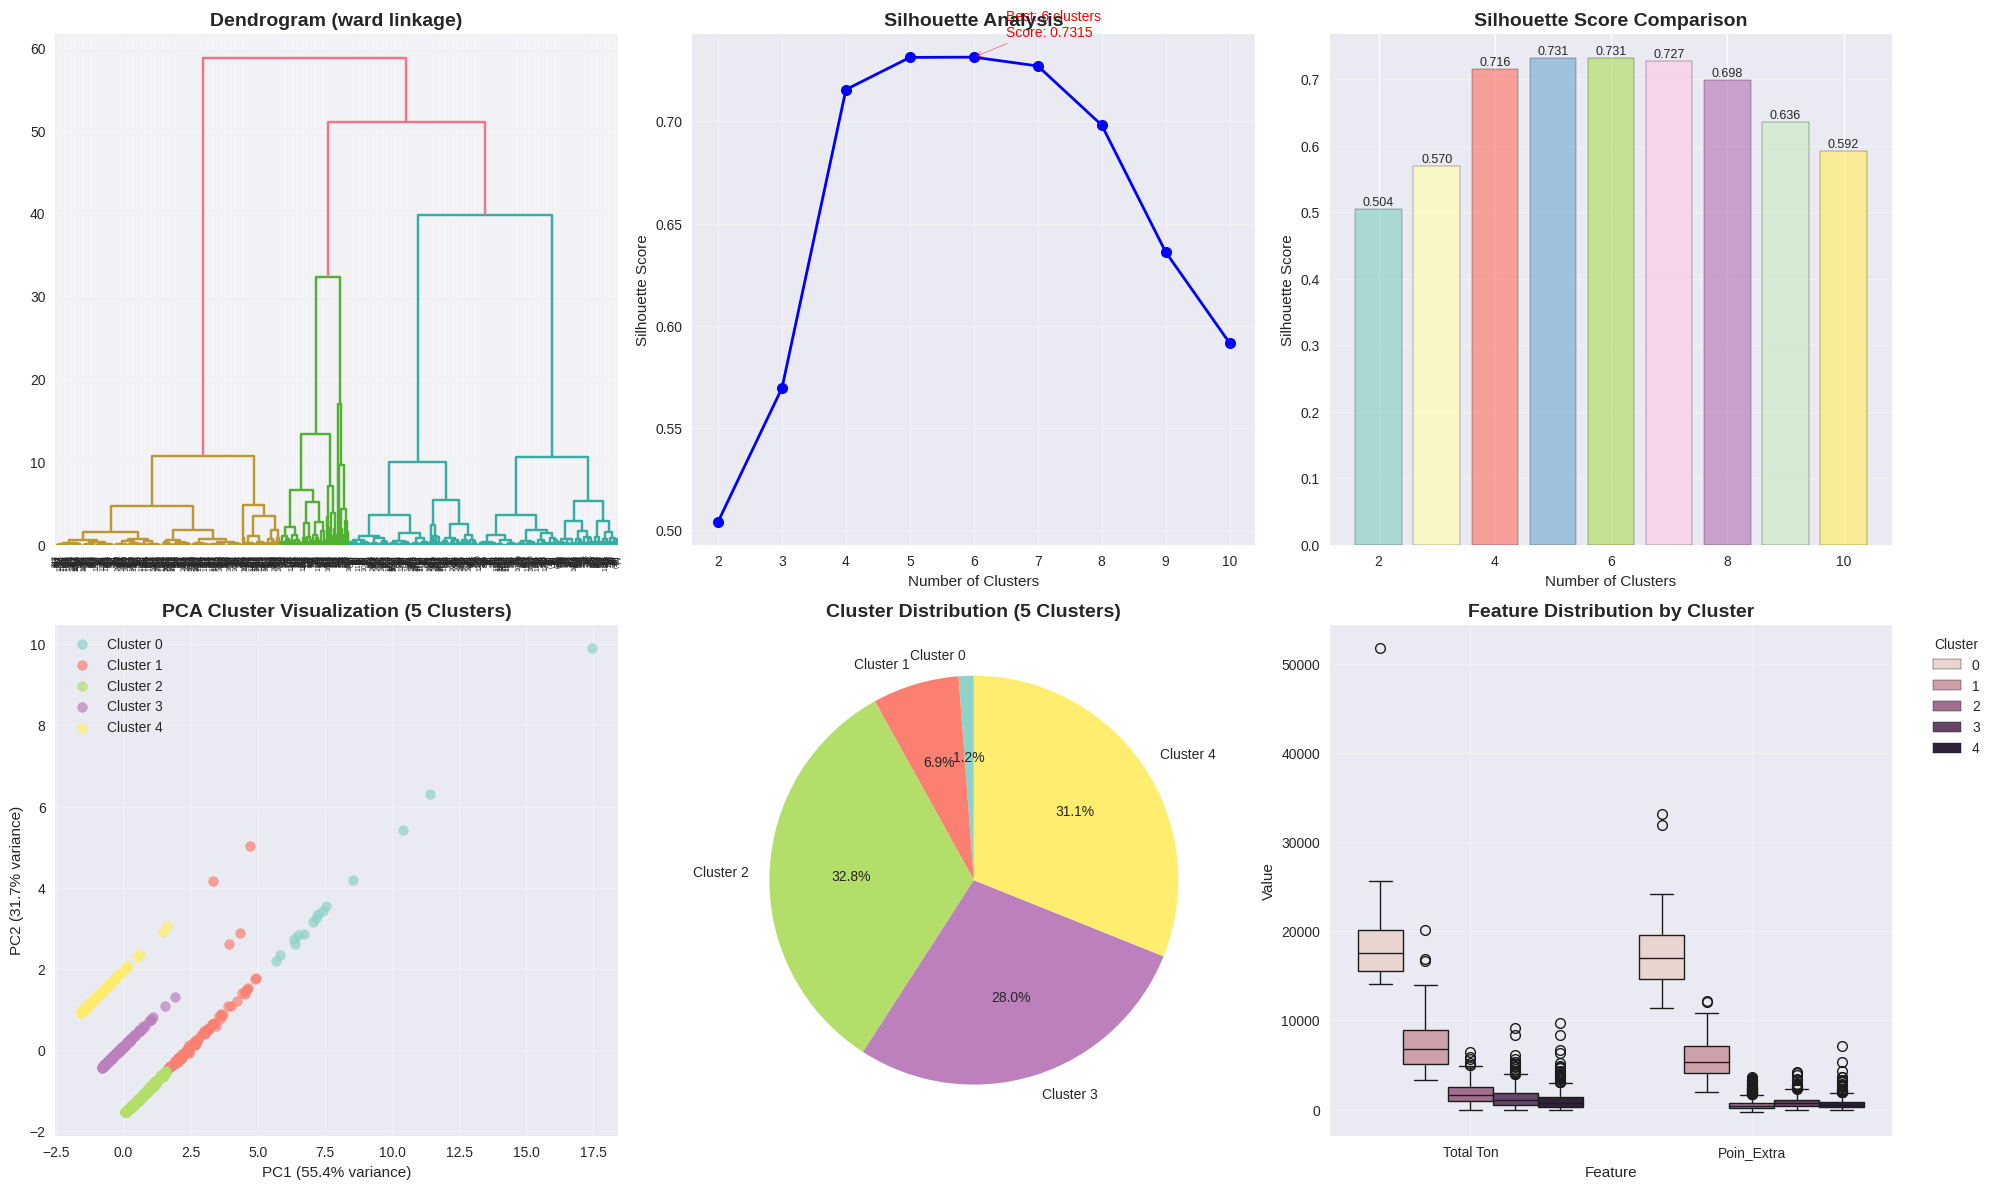


🎯 DETAILED ANALYSIS FOR 5 CLUSTERS
Silhouette Score: 0.7313

📊 Cluster Size Distribution:
   Cluster 0:   15 stores (  1.2%)
   Cluster 1:   86 stores (  6.9%)
   Cluster 2:  412 stores ( 32.8%)
   Cluster 3:  352 stores ( 28.0%)
   Cluster 4:  390 stores ( 31.1%)

📈 Cluster Characteristics (Mean ± Std):

Total Ton:
   Cluster 0: 20263.14 ± 9273.51
   Cluster 1:  7609.51 ± 3228.95
   Cluster 2:  1864.65 ± 1172.15
   Cluster 3:  1398.71 ± 1275.55
   Cluster 4:  1074.92 ± 1202.00

Poin_Extra:
   Cluster 0: 18634.24 ± 6533.68
   Cluster 1:  5892.16 ± 2331.66
   Cluster 2:   660.27 ± 796.38
   Cluster 3:   843.15 ± 696.82
   Cluster 4:   711.42 ± 785.38

🌍 Regional Distribution by Cluster (%):
Regional      3      4      5
Cluster                      
0           0.0    0.0  100.0
1           2.3    2.3   95.3
2           0.0    0.0  100.0
3         100.0    0.0    0.0
4           0.0  100.0    0.0

📋 FINAL RESULT DATAFRAME
Shape: (1255, 6)
Columns: ['ID_Toko', 'Total_Ton', 'Poin_Extra',

In [ ]:
# Contoh implementasi lengkap dengan data yang sudah Anda preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# Jalankan kode ini setelah preprocessing data Anda
def comprehensive_hierarchical_analysis(X_scaled, agg_encoded):
    """
    Fungsi untuk menjalankan analisis hierarchical clustering yang komprehensif

    Parameters:
    X_scaled: Data yang sudah di-scale
    agg_encoded: Data asli dengan encoding
    """

    print("🔍 STARTING HIERARCHICAL CLUSTERING ANALYSIS")
    print("=" * 60)

    # 1. HIERARCHICAL CLUSTERING DENGAN BERBAGAI METODE LINKAGE
    linkage_methods = ['ward', 'complete', 'average', 'single']
    best_method = None
    best_score = -1
    method_scores = {}

    print("\n📊 Testing different linkage methods...")
    for method in linkage_methods:
        try:
            # Compute linkage matrix
            Z = linkage(X_scaled, method=method)

            # Test with 5 clusters
            hierarchical = AgglomerativeClustering(n_clusters=5, linkage=method)
            cluster_labels = hierarchical.fit_predict(X_scaled)
            score = silhouette_score(X_scaled, cluster_labels)
            method_scores[method] = score

            print(f"  {method:10s}: Silhouette Score = {score:.4f}")

            if score > best_score:
                best_score = score
                best_method = method

        except Exception as e:
            print(f"  {method:10s}: Error - {str(e)}")

    print(f"\n🏆 Best linkage method: {best_method} (Score: {best_score:.4f})")

    # 2. ANALISIS SILHOUETTE UNTUK CLUSTER 2-10
    print("\n📈 Analyzing silhouette scores for clusters 2-10...")
    silhouette_scores = {}
    cluster_results = {}

    for n_clusters in range(2, 11):
        hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=best_method)
        cluster_labels = hierarchical.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, cluster_labels)

        silhouette_scores[n_clusters] = score
        cluster_results[n_clusters] = cluster_labels

        print(f"  Clusters: {n_clusters:2d} | Silhouette Score: {score:.4f}")

    # 3. PLOTTING RESULTS
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))

    # Plot 1: Dendrogram
    Z = linkage(X_scaled, method=best_method)
    dendrogram(Z, truncate_mode='level', p=10, ax=axes[0,0])
    axes[0,0].set_title(f'Dendrogram ({best_method} linkage)', fontsize=14, fontweight='bold')
    axes[0,0].grid(True, alpha=0.3)

    # Plot 2: Silhouette Scores
    clusters = list(silhouette_scores.keys())
    scores = list(silhouette_scores.values())
    axes[0,1].plot(clusters, scores, 'bo-', linewidth=2, markersize=8)
    axes[0,1].set_xlabel('Number of Clusters')
    axes[0,1].set_ylabel('Silhouette Score')
    axes[0,1].set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
    axes[0,1].grid(True, alpha=0.3)

    # Highlight best score
    best_k = max(silhouette_scores, key=silhouette_scores.get)
    best_silhouette = silhouette_scores[best_k]
    axes[0,1].annotate(f'Best: {best_k} clusters\nScore: {best_silhouette:.4f}',
                      xy=(best_k, best_silhouette),
                      xytext=(best_k + 0.5, best_silhouette + 0.01),
                      arrowprops=dict(arrowstyle='->', color='red'),
                      fontsize=10, color='red')

    # Plot 3: Silhouette Bar Chart
    colors = plt.cm.Set3(np.linspace(0, 1, len(clusters)))
    bars = axes[0,2].bar(clusters, scores, color=colors, alpha=0.7, edgecolor='black')
    axes[0,2].set_xlabel('Number of Clusters')
    axes[0,2].set_ylabel('Silhouette Score')
    axes[0,2].set_title('Silhouette Score Comparison', fontsize=14, fontweight='bold')
    axes[0,2].grid(True, alpha=0.3, axis='y')

    # Add value labels on bars
    for bar, score in zip(bars, scores):
        height = bar.get_height()
        axes[0,2].text(bar.get_x() + bar.get_width()/2., height + 0.001,
                      f'{score:.3f}', ha='center', va='bottom', fontsize=9)

    # 4. ANALISIS UNTUK 5 CLUSTERS
    cluster_5_labels = cluster_results[5]

    # Plot 4: PCA Visualization for 5 clusters
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    colors_5 = plt.cm.Set3(np.linspace(0, 1, 5))
    for i in range(5):
        mask = cluster_5_labels == i
        axes[1,0].scatter(X_pca[mask, 0], X_pca[mask, 1],
                         c=[colors_5[i]], alpha=0.7, s=50, label=f'Cluster {i}')

    axes[1,0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
    axes[1,0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
    axes[1,0].set_title('PCA Cluster Visualization (5 Clusters)', fontsize=14, fontweight='bold')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)

    # Plot 5: Cluster Size Distribution
    cluster_counts = pd.Series(cluster_5_labels).value_counts().sort_index()
    wedges, texts, autotexts = axes[1,1].pie(cluster_counts.values,
                                            labels=[f'Cluster {i}' for i in cluster_counts.index],
                                            colors=colors_5, autopct='%1.1f%%', startangle=90)
    axes[1,1].set_title('Cluster Distribution (5 Clusters)', fontsize=14, fontweight='bold')

    # Plot 6: Feature Analysis by Cluster
    analysis_df = agg_encoded.copy()
    analysis_df['Cluster'] = cluster_5_labels

    # Melt data untuk plotting
    feature_cols = ['Total Ton', 'Poin_Extra']
    melted_df = analysis_df[feature_cols + ['Cluster']].melt(
        id_vars=['Cluster'],
        var_name='Feature',
        value_name='Value'
    )

    sns.boxplot(data=melted_df, x='Feature', y='Value', hue='Cluster', ax=axes[1,2])
    axes[1,2].set_title('Feature Distribution by Cluster', fontsize=14, fontweight='bold')
    axes[1,2].grid(True, alpha=0.3)
    axes[1,2].legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

    # 5. DETAILED ANALYSIS FOR 5 CLUSTERS
    print(f"\n🎯 DETAILED ANALYSIS FOR 5 CLUSTERS")
    print("=" * 50)
    print(f"Silhouette Score: {silhouette_scores[5]:.4f}")

    analysis_df = agg_encoded.copy()
    analysis_df['Cluster'] = cluster_5_labels

    # Cluster size distribution
    cluster_counts = pd.Series(cluster_5_labels).value_counts().sort_index()
    print(f"\n📊 Cluster Size Distribution:")
    for cluster, count in cluster_counts.items():
        percentage = (count / len(cluster_5_labels)) * 100
        print(f"   Cluster {cluster}: {count:4d} stores ({percentage:5.1f}%)")

    # Statistical summary by cluster
    print(f"\n📈 Cluster Characteristics (Mean ± Std):")
    numeric_cols = ['Total Ton', 'Poin_Extra']
    for col in numeric_cols:
        print(f"\n{col}:")
        for cluster in range(5):
            cluster_data = analysis_df[analysis_df['Cluster'] == cluster][col]
            mean_val = cluster_data.mean()
            std_val = cluster_data.std()
            print(f"   Cluster {cluster}: {mean_val:8.2f} ± {std_val:6.2f}")

    # Regional distribution by cluster
    if 'Regional' in analysis_df.columns:
        print(f"\n🌍 Regional Distribution by Cluster (%):")
        regional_dist = pd.crosstab(analysis_df['Cluster'], analysis_df['Regional'],
                                   normalize='index') * 100
        print(regional_dist.round(1))

    # 6. CREATE FINAL RESULT DATAFRAME
    final_df = pd.DataFrame({
        'ID_Toko': agg_encoded['ID Toko'].values,
        'Total_Ton': agg_encoded['Total Ton'].values,
        'Poin_Extra': agg_encoded['Poin_Extra'].values,
        'Region': agg_encoded['Regional'].values,
        'District': agg_encoded.get('Cluster', 'Unknown').values,  # Original cluster/district
        'Cluster': cluster_5_labels  # New hierarchical cluster
    })

    print(f"\n📋 FINAL RESULT DATAFRAME")
    print("=" * 30)
    print(f"Shape: {final_df.shape}")
    print(f"Columns: {list(final_df.columns)}")
    print("\nFirst 10 rows:")
    print(final_df.head(10))

    # 7. CLUSTER PROFILING
    print(f"\n🎭 CLUSTER PROFILING")
    print("=" * 30)

    cluster_profiles = final_df.groupby('Cluster').agg({
        'Total_Ton': ['count', 'mean', 'std', 'min', 'max'],
        'Poin_Extra': ['mean', 'std', 'min', 'max']
    }).round(2)

    print(cluster_profiles)

    # Create cluster interpretations
    print(f"\n🔍 CLUSTER INTERPRETATIONS:")
    cluster_means = final_df.groupby('Cluster')[['Total_Ton', 'Poin_Extra']].mean()

    for cluster in range(5):
        ton_mean = cluster_means.loc[cluster, 'Total_Ton']
        poin_mean = cluster_means.loc[cluster, 'Poin_Extra']
        count = len(final_df[final_df['Cluster'] == cluster])

        # Determine cluster characteristics
        if ton_mean > cluster_means['Total_Ton'].mean():
            ton_desc = "High Volume"
        else:
            ton_desc = "Low Volume"

        if poin_mean > cluster_means['Poin_Extra'].mean():
            poin_desc = "High Extra Points"
        else:
            poin_desc = "Low Extra Points"

        print(f"   Cluster {cluster} ({count:3d} stores): {ton_desc} + {poin_desc}")
        print(f"      Avg Total Ton: {ton_mean:6.1f}, Avg Poin Extra: {poin_mean:6.1f}")

    return {
        'silhouette_scores': silhouette_scores,
        'cluster_results': cluster_results,
        'best_method': best_method,
        'final_dataframe': final_df,
        'analysis_summary': {
            'best_clusters': best_k,
            'best_silhouette': best_silhouette,
            'cluster_5_score': silhouette_scores[5]
        }
    }

# CARA PENGGUNAAN:
# ================
# Setelah menjalankan preprocessing code Anda, jalankan:
results = comprehensive_hierarchical_analysis(X_scaled, agg_encoded)
#
# Untuk menyimpan hasil:
results['final_dataframe'].to_csv('hierarchical_clustering_results2.csv', index=False)

# K-Means

In [ ]:
df_data['Total Ton'] = pd.to_numeric(df_data['Total Ton'].astype(str).str.replace(',', '.'), errors='coerce')
df_data['Total Poin'] = pd.to_numeric(df_data['Total Poin'].astype(str).str.replace(',', '.'), errors='coerce')
df_data['Total Reward'] = df_data['Total Reward'].astype(str).str.replace('Rp', '', regex=False).str.replace('.', '', regex=False).str.strip()
df_data['Total Reward'] = pd.to_numeric(df_data['Total Reward'], errors='coerce')
df_data.dropna(subset=['Total Ton', 'Total Poin', 'Total Reward'], inplace=True)
agg = df_data.groupby('ID Toko').agg({
    'Total Ton': 'sum',
    'Total Poin': 'sum',
    'Total Reward': 'sum',
    'Regional': 'first',
    'Cluster': 'first'}).reset_index()
agg['Poin_Extra'] = agg['Total Poin'] - agg['Total Ton']
agg['Reward_per_Poin'] = agg['Total Reward'] / agg['Total Poin']
agg.replace([np.inf, -np.inf], np.nan, inplace=True)
agg.dropna(subset=['Poin_Extra', 'Reward_per_Poin'], inplace=True)
agg['Regional'] = agg['Regional'].astype(str)
encoder = OneHotEncoder(
    sparse_output=False,
    drop='first',
    categories=[['3', '4', '5']]
)
region_encoded = encoder.fit_transform(agg[['Regional']])
region_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(['Regional']))
agg_encoded = pd.concat([agg.reset_index(drop=True), region_df.reset_index(drop=True)], axis=1)
scaler = StandardScaler()
X = agg_encoded[['Total Ton', 'Poin_Extra', 'Regional_4', 'Regional_5']]
X_scaled = scaler.fit_transform(X)

DATA VISUALIZATION BEFORE K-MEANS CLUSTERING
Data shape: (1255, 4)
Features: Total Ton, Poin_Extra, Regional_4, Regional_5
Number of samples: 1255
Number of features: 4

Descriptive Statistics (Scaled Data):
--------------------------------------------------
       Total Ton  Poin_Extra  Regional_4  Regional_5
count   1255.000    1255.000    1255.000    1255.000
mean      -0.000       0.000      -0.000       0.000
std        1.000       1.000       1.000       1.000
min       -0.680      -0.628      -0.674      -0.826
25%       -0.486      -0.410      -0.674      -0.826
50%       -0.277      -0.291      -0.674      -0.826
75%        0.092      -0.051       1.484       1.211
max       16.102      12.299       1.484       1.211


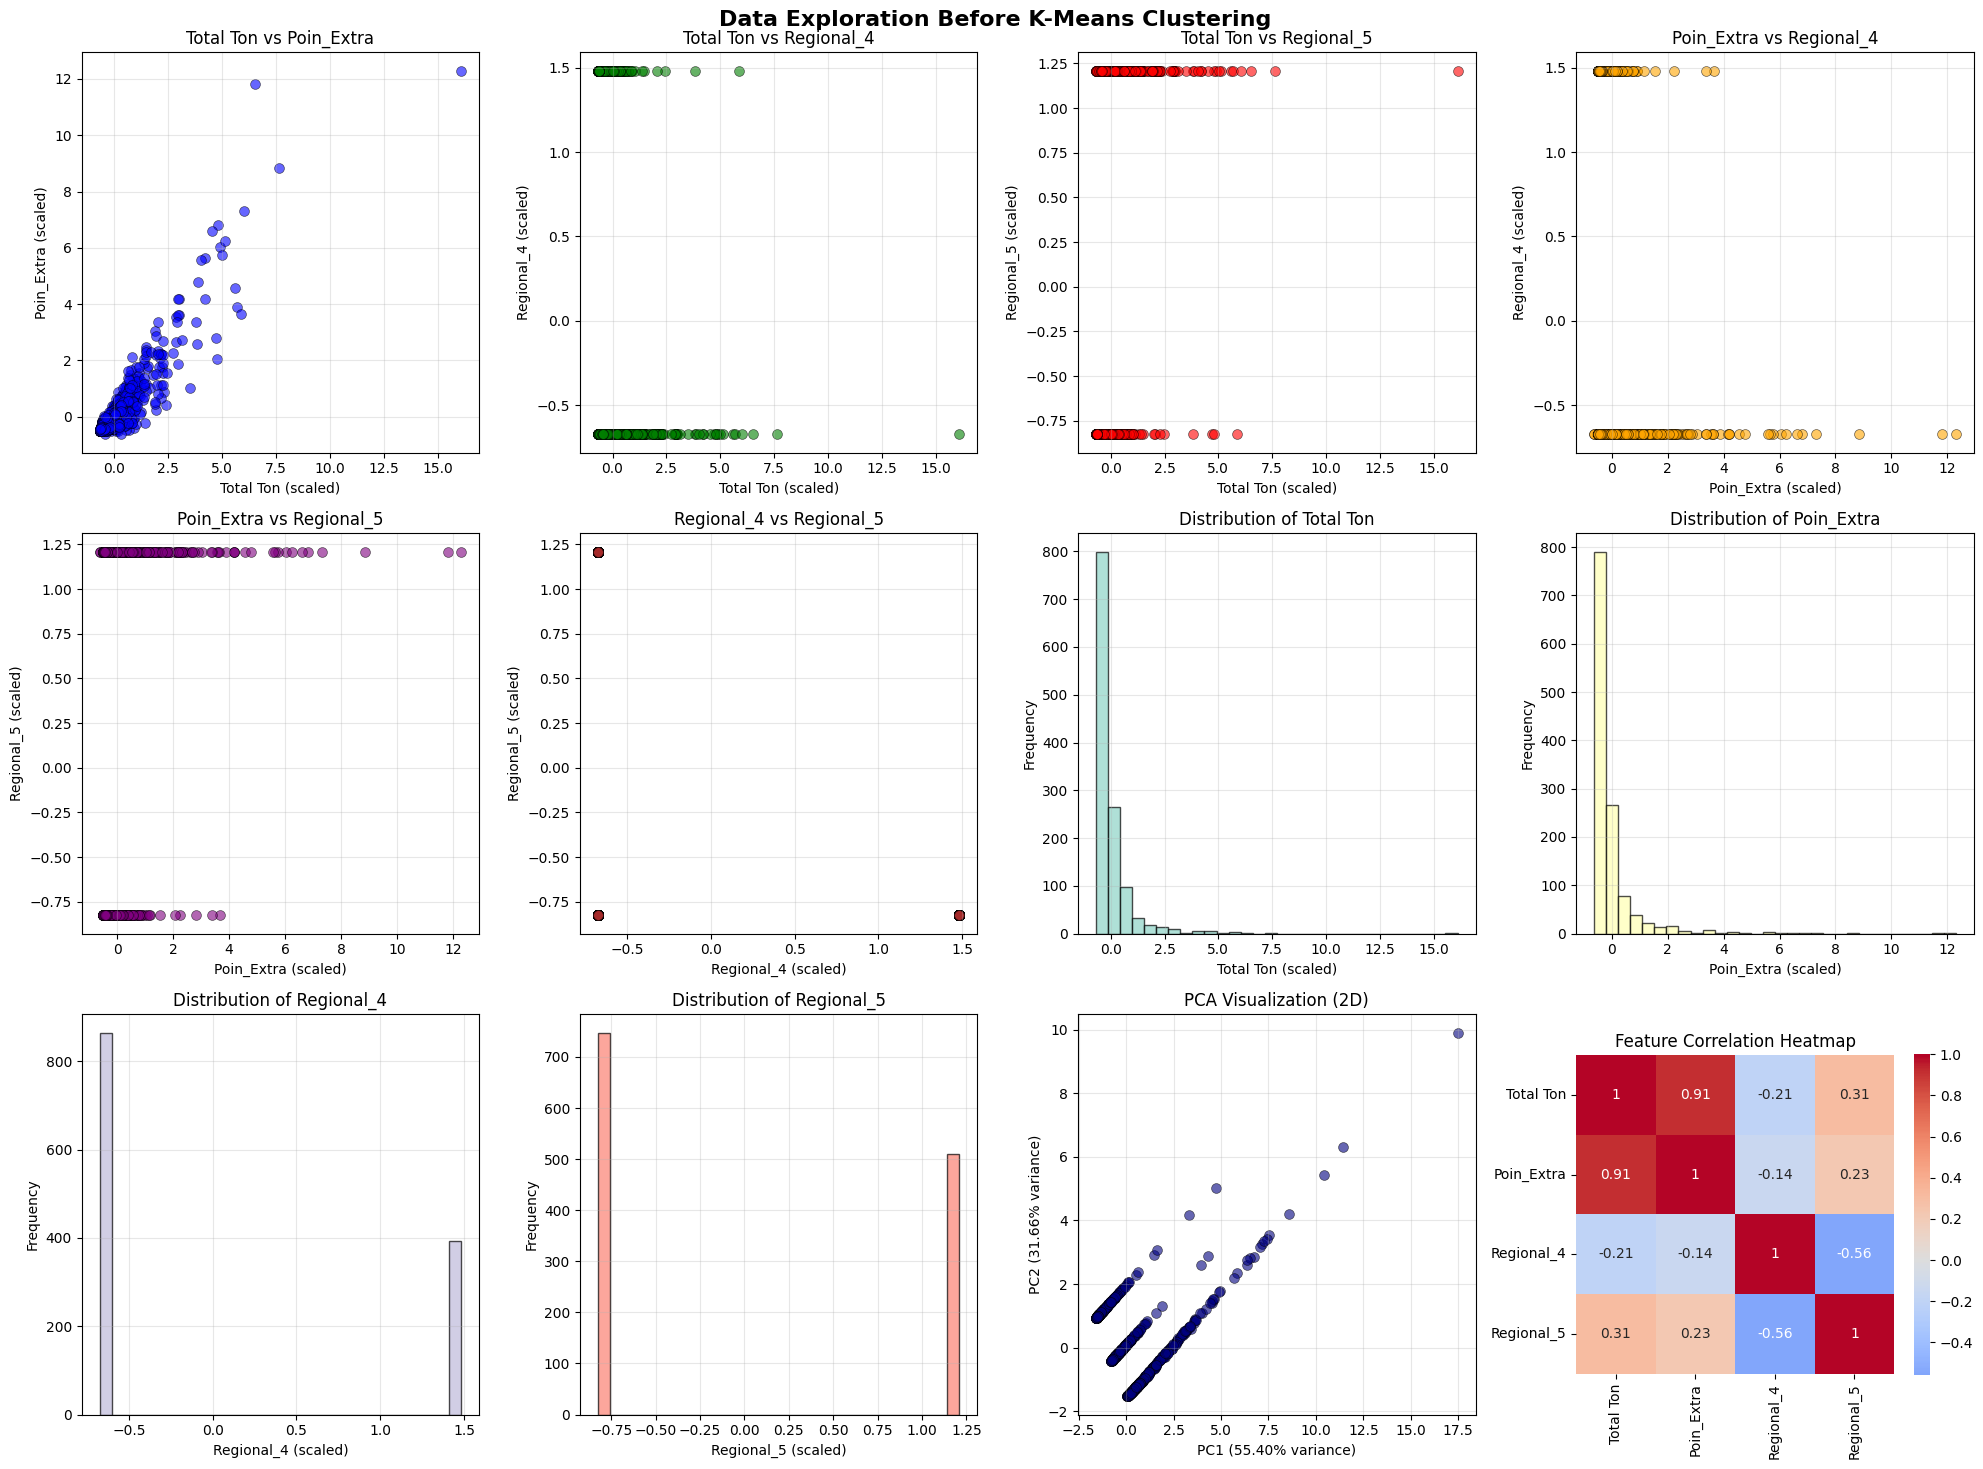


DETAILED DATA ANALYSIS

Correlation Matrix:
----------------------------------------
            Total Ton  Poin_Extra  Regional_4  Regional_5
Total Ton       1.000       0.915      -0.207       0.310
Poin_Extra      0.915       1.000      -0.140       0.226
Regional_4     -0.207      -0.140       1.000      -0.557
Regional_5      0.310       0.226      -0.557       1.000

PCA Analysis:
----------------------------------------
PC1 explains 55.40% of variance
PC2 explains 31.66% of variance
Total variance explained by 2 components: 87.06%

PCA Components:
              PC1    PC2
Total Ton   0.600  0.355
Poin_Extra  0.572  0.429
Regional_4 -0.363  0.630
Regional_5  0.425 -0.541

Data Range Analysis (After Scaling):
--------------------------------------------------
Total Ton       | Min: -0.680 | Max: 16.102 | Mean: -0.000 | Std:  1.000
Poin_Extra      | Min: -0.628 | Max: 12.299 | Mean:  0.000 | Std:  1.000
Regional_4      | Min: -0.674 | Max:  1.484 | Mean: -0.000 | Std:  1.000
Regio

In [ ]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Assuming X_scaled is already available from preprocessing
# X_scaled contains: ['Total Ton', 'Poin_Extra', 'Regional_4', 'Regional_5']

print("="*70)
print("DATA VISUALIZATION BEFORE K-MEANS CLUSTERING")
print("="*70)

# Informasi dasar tentang data
print(f"Data shape: {X_scaled.shape}")
print(f"Features: Total Ton, Poin_Extra, Regional_4, Regional_5")
print(f"Number of samples: {X_scaled.shape[0]}")
print(f"Number of features: {X_scaled.shape[1]}")

# Statistik deskriptif
print(f"\nDescriptive Statistics (Scaled Data):")
print("-" * 50)
feature_names = ['Total Ton', 'Poin_Extra', 'Regional_4', 'Regional_5']
stats_df = pd.DataFrame(X_scaled, columns=feature_names)
print(stats_df.describe().round(3))

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 15))
fig.suptitle('Data Exploration Before K-Means Clustering', fontsize=16, fontweight='bold')

# 1. Pairwise Scatter Plots
plt.subplot(3, 4, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.6, s=50, c='blue', edgecolors='black', linewidth=0.5)
plt.xlabel('Total Ton (scaled)')
plt.ylabel('Poin_Extra (scaled)')
plt.title('Total Ton vs Poin_Extra')
plt.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 1])


plt.subplot(3, 4, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], alpha=0.6, s=50, c='green', edgecolors='black', linewidth=0.5)
plt.xlabel('Total Ton (scaled)')
plt.ylabel('Regional_4 (scaled)')
plt.title('Total Ton vs Regional_4')
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 3], alpha=0.6, s=50, c='red', edgecolors='black', linewidth=0.5)
plt.xlabel('Total Ton (scaled)')
plt.ylabel('Regional_5 (scaled)')
plt.title('Total Ton vs Regional_5')
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 4)
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], alpha=0.6, s=50, c='orange', edgecolors='black', linewidth=0.5)
plt.xlabel('Poin_Extra (scaled)')
plt.ylabel('Regional_4 (scaled)')
plt.title('Poin_Extra vs Regional_4')
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 5)
plt.scatter(X_scaled[:, 1], X_scaled[:, 3], alpha=0.6, s=50, c='purple', edgecolors='black', linewidth=0.5)
plt.xlabel('Poin_Extra (scaled)')
plt.ylabel('Regional_5 (scaled)')
plt.title('Poin_Extra vs Regional_5')
plt.grid(True, alpha=0.3)

plt.subplot(3, 4, 6)
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], alpha=0.6, s=50, c='brown', edgecolors='black', linewidth=0.5)
plt.xlabel('Regional_4 (scaled)')
plt.ylabel('Regional_5 (scaled)')
plt.title('Regional_4 vs Regional_5')
plt.grid(True, alpha=0.3)

# 2. Distribution Plots
for i, feature in enumerate(feature_names):
    plt.subplot(3, 4, 7 + i)
    plt.hist(X_scaled[:, i], bins=30, alpha=0.7, color=plt.cm.Set3(i), edgecolor='black')
    plt.xlabel(f'{feature} (scaled)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.grid(True, alpha=0.3)

# 3. PCA Visualization for overall pattern
plt.subplot(3, 4, 11)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=50, c='navy', edgecolors='black', linewidth=0.5)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA Visualization (2D)')
plt.grid(True, alpha=0.3)

# 4. Correlation Heatmap
plt.subplot(3, 4, 12)
correlation_matrix = np.corrcoef(X_scaled.T)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            xticklabels=feature_names, yticklabels=feature_names,
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()

# 5. Detailed Analysis
print(f"\n{'='*70}")
print("DETAILED DATA ANALYSIS")
print(f"{'='*70}")

# Correlation Analysis
print("\nCorrelation Matrix:")
print("-" * 40)
corr_df = pd.DataFrame(correlation_matrix, columns=feature_names, index=feature_names)
print(corr_df.round(3))

# PCA Analysis
print(f"\nPCA Analysis:")
print("-" * 40)
print(f"PC1 explains {pca.explained_variance_ratio_[0]:.2%} of variance")
print(f"PC2 explains {pca.explained_variance_ratio_[1]:.2%} of variance")
print(f"Total variance explained by 2 components: {sum(pca.explained_variance_ratio_):.2%}")

print(f"\nPCA Components:")
pca_components = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=feature_names)
print(pca_components.round(3))

# Data Range Analysis
print(f"\nData Range Analysis (After Scaling):")
print("-" * 50)
for i, feature in enumerate(feature_names):
    min_val = X_scaled[:, i].min()
    max_val = X_scaled[:, i].max()
    mean_val = X_scaled[:, i].mean()
    std_val = X_scaled[:, i].std()
    print(f"{feature:15} | Min: {min_val:6.3f} | Max: {max_val:6.3f} | Mean: {mean_val:6.3f} | Std: {std_val:6.3f}")

# Outlier Detection using IQR method
print(f"\nOutlier Analysis (IQR Method):")
print("-" * 40)
for i, feature in enumerate(feature_names):
    Q1 = np.percentile(X_scaled[:, i], 25)
    Q3 = np.percentile(X_scaled[:, i], 75)
    IQR = Q3 - Q1
    outlier_threshold_low = Q1 - 1.5 * IQR
    outlier_threshold_high = Q3 + 1.5 * IQR

    outliers = np.sum((X_scaled[:, i] < outlier_threshold_low) | (X_scaled[:, i] > outlier_threshold_high))
    outlier_percentage = (outliers / len(X_scaled)) * 100

    print(f"{feature:15} | Outliers: {outliers:4d} ({outlier_percentage:5.1f}%)")

# 6. Data Quality Assessment
print(f"\n{'='*70}")
print("DATA QUALITY ASSESSMENT")
print(f"{'='*70}")

# Check for missing values
missing_count = np.sum(np.isnan(X_scaled))
print(f"Missing values: {missing_count}")

# Check for infinite values
inf_count = np.sum(np.isinf(X_scaled))
print(f"Infinite values: {inf_count}")

# Check data balance
print(f"\nData Distribution Summary:")
print(f"Total samples: {X_scaled.shape[0]}")
print(f"Features: {X_scaled.shape[1]}")
print(f"Data type: {X_scaled.dtype}")

# Regional distribution (from encoded features)
regional_3_count = np.sum((X_scaled[:, 2] == 0) & (X_scaled[:, 3] == 0))  # Neither Regional_4 nor Regional_5
regional_4_count = np.sum(X_scaled[:, 2] == 1)  # Regional_4 = 1
regional_5_count = np.sum(X_scaled[:, 3] == 1)  # Regional_5 = 1

print(f"\nRegional Distribution:")
print(f"Regional 3: {regional_3_count} ({regional_3_count/X_scaled.shape[0]*100:.1f}%)")
print(f"Regional 4: {regional_4_count} ({regional_4_count/X_scaled.shape[0]*100:.1f}%)")
print(f"Regional 5: {regional_5_count} ({regional_5_count/X_scaled.shape[0]*100:.1f}%)")

print(f"\n{'='*70}")
print("DATA READY FOR K-MEANS CLUSTERING ANALYSIS")
print(f"{'='*70}")

K-MEANS CLUSTERING ANALYSIS

Analisis Silhouette Score untuk setiap cluster:
--------------------------------------------------
K=2: Silhouette Score = 0.5206
K=3: Silhouette Score = 0.5664
K=4: Silhouette Score = 0.6993
K=5: Silhouette Score = 0.7344
K=6: Silhouette Score = 0.7350
K=7: Silhouette Score = 0.7186
K=8: Silhouette Score = 0.6840
K=9: Silhouette Score = 0.6511
K=10: Silhouette Score = 0.6088


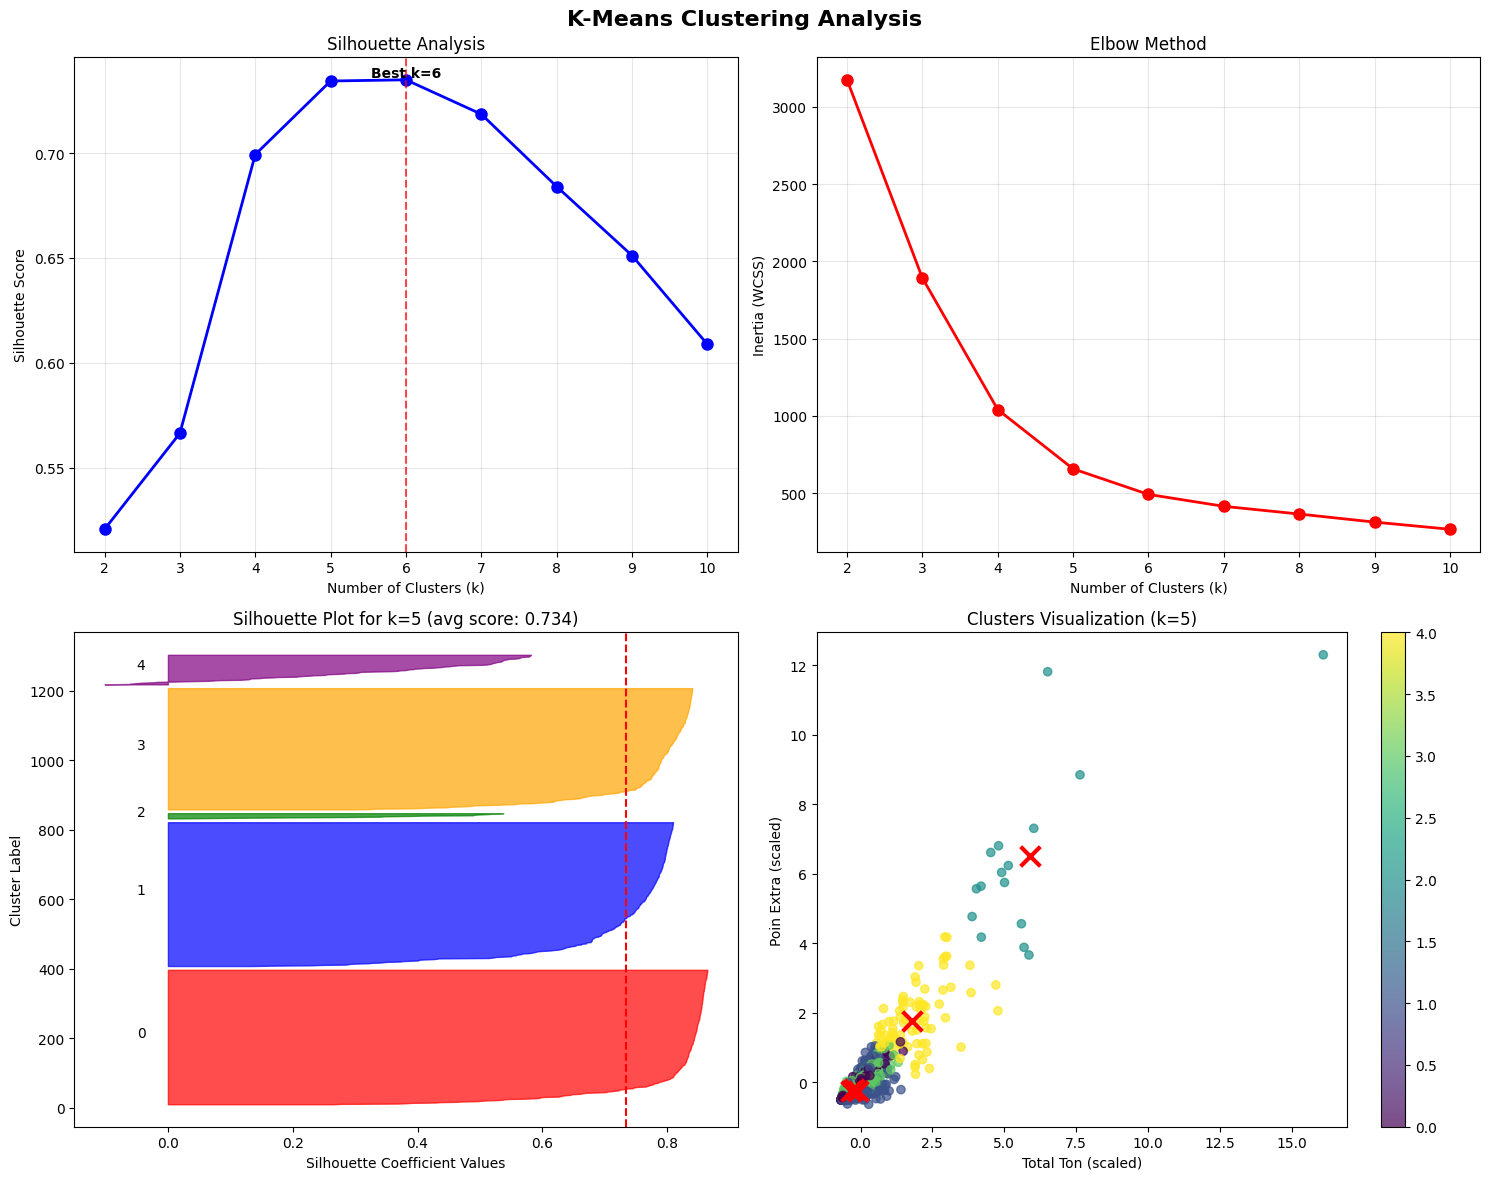


DETAILED ANALYSIS FOR K=5

Cluster Summary Statistics:
--------------------------------------------------------------------------------
        Total Ton                                        Poin_Extra           \
            count      mean      std       min       max       mean      std   
Cluster                                                                        
0             388   1033.82  1058.28      4.04   6678.75     683.17   678.14   
1             415   1877.04  1177.06      6.00   6442.50     683.94   840.73   
2              16  20258.31  8959.08  14083.20  51795.92   18144.61  6608.99   
3             350   1356.68  1150.59      8.25   6155.13     826.36   661.43   
4              86   7663.95  2842.41   3805.48  16862.15    5861.25  2268.67   

                             Total Reward                            \
              min       max          mean          std          min   
Cluster                                                               
0        

In [ ]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

# Assuming your preprocessing code has been executed and X_scaled is ready
# X_scaled should contain the scaled features: ['Total Ton', 'Poin_Extra', 'Regional_4', 'Regional_5']

# 1. K-Means Model dengan X_scaled
print("="*60)
print("K-MEANS CLUSTERING ANALYSIS")
print("="*60)

# 2. Analisis Silhouette untuk cluster 2-10
k_range = range(2, 11)
silhouette_scores = []
inertias = []

print("\nAnalisis Silhouette Score untuk setiap cluster:")
print("-" * 50)

for k in k_range:
    # Fit K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Hitung Silhouette Score
    sil_score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(sil_score)

    # Hitung Inertia untuk Elbow Method
    inertias.append(kmeans.inertia_)

    print(f"K={k}: Silhouette Score = {sil_score:.4f}")

# 3. Visualisasi Analisis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('K-Means Clustering Analysis', fontsize=16, fontweight='bold')

# Plot 1: Silhouette Score
axes[0, 0].plot(k_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Number of Clusters (k)')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].set_title('Silhouette Analysis')
axes[0, 0].grid(True, alpha=0.3)
best_k_sil = k_range[np.argmax(silhouette_scores)]
axes[0, 0].axvline(x=best_k_sil, color='red', linestyle='--', alpha=0.7)
axes[0, 0].text(best_k_sil, max(silhouette_scores), f'Best k={best_k_sil}',
                ha='center', va='bottom', fontweight='bold')

# Plot 2: Elbow Method
axes[0, 1].plot(k_range, inertias, 'ro-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Number of Clusters (k)')
axes[0, 1].set_ylabel('Inertia (WCSS)')
axes[0, 1].set_title('Elbow Method')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Silhouette Analysis Detail untuk k=5
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels_5 = kmeans_5.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster_labels_5)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels_5)

y_lower = 10
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i in range(5):
    cluster_silhouette_values = sample_silhouette_values[cluster_labels_5 == i]
    cluster_silhouette_values.sort()

    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    axes[1, 0].fill_betweenx(np.arange(y_lower, y_upper),
                            0, cluster_silhouette_values,
                            facecolor=colors[i], edgecolor=colors[i], alpha=0.7)

    axes[1, 0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

axes[1, 0].set_xlabel('Silhouette Coefficient Values')
axes[1, 0].set_ylabel('Cluster Label')
axes[1, 0].set_title(f'Silhouette Plot for k=5 (avg score: {silhouette_avg:.3f})')
axes[1, 0].axvline(x=silhouette_avg, color="red", linestyle="--")

# Plot 4: Cluster Distribution (2D visualization using first 2 features)
scatter = axes[1, 1].scatter(X_scaled[:, 0], X_scaled[:, 1],
                           c=cluster_labels_5, cmap='viridis', alpha=0.7)
centers = kmeans_5.cluster_centers_
axes[1, 1].scatter(centers[:, 0], centers[:, 1],
                  c='red', marker='x', s=200, alpha=1, linewidths=3)
axes[1, 1].set_xlabel('Total Ton (scaled)')
axes[1, 1].set_ylabel('Poin Extra (scaled)')
axes[1, 1].set_title('Clusters Visualization (k=5)')
plt.colorbar(scatter, ax=axes[1, 1])

plt.tight_layout()
plt.show()

# 4. Detailed Analysis untuk k=5
print(f"\n{'='*60}")
print("DETAILED ANALYSIS FOR K=5")
print(f"{'='*60}")

# Tambahkan cluster labels ke dataframe asli
agg_final = agg_encoded.copy()
agg_final['Cluster'] = cluster_labels_5

# Buat summary statistik per cluster
print("\nCluster Summary Statistics:")
print("-" * 80)

cluster_summary = agg_final.groupby('Cluster').agg({
    'Total Ton': ['count', 'mean', 'std', 'min', 'max'],
    'Poin_Extra': ['mean', 'std', 'min', 'max'],
    'Total Reward': ['mean', 'std', 'min', 'max'],
    'Reward_per_Poin': ['mean', 'std']
}).round(2)

print(cluster_summary)

# Analisis distribusi regional per cluster
print(f"\n{'Regional Distribution per Cluster:'}")
print("-" * 50)
regional_dist = pd.crosstab(agg_final['Cluster'], agg_final['Regional'], normalize='index') * 100
print(regional_dist.round(1))

# Cluster Characteristics Analysis
print(f"\n{'CLUSTER CHARACTERISTICS:'}")
print("-" * 50)

for cluster in range(5):
    cluster_data = agg_final[agg_final['Cluster'] == cluster]
    print(f"\nCluster {cluster} ({len(cluster_data)} stores):")
    print(f"  - Avg Total Ton: {cluster_data['Total Ton'].mean():.2f}")
    print(f"  - Avg Poin Extra: {cluster_data['Poin_Extra'].mean():.2f}")
    print(f"  - Avg Total Reward: Rp {cluster_data['Total Reward'].mean():,.0f}")
    print(f"  - Avg Reward per Poin: Rp {cluster_data['Reward_per_Poin'].mean():.0f}")
    print(f"  - Most common Regional: {cluster_data['Regional'].mode().iloc[0]}")

# 5. Final Result DataFrame
print(f"\n{'='*60}")
print("FINAL RESULT DATAFRAME")
print(f"{'='*60}")

# Buat dataframe final sesuai permintaan
final_df = agg_final[['ID Toko', 'Total Ton', 'Poin_Extra', 'Regional', 'Cluster']].copy()

# Tambahkan kolumn District (mapping dari Regional)
district_mapping = {
    '3': 'District_A',
    '4': 'District_B',
    '5': 'District_C'
}
final_df['District'] = final_df['Regional'].map(district_mapping)

# Reorder columns
final_df = final_df[['ID Toko', 'Total Ton', 'Poin_Extra', 'Regional', 'District', 'Cluster']]

print("\nSample of Final DataFrame:")
print(final_df.head(10))

print(f"\nDataFrame Shape: {final_df.shape}")
print(f"Columns: {list(final_df.columns)}")

# 6. Model Performance Metrics
print(f"\n{'='*60}")
print("MODEL PERFORMANCE METRICS")
print(f"{'='*60}")

print(f"Silhouette Score (k=5): {silhouette_avg:.4f}")
print(f"Inertia (WCSS): {kmeans_5.inertia_:.2f}")
print(f"Number of iterations: {kmeans_5.n_iter_}")

# Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X_scaled, cluster_labels_5)
print(f"Calinski-Harabasz Index: {ch_score:.2f}")

# Davies-Bouldin Index
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X_scaled, cluster_labels_5)
print(f"Davies-Bouldin Index: {db_score:.4f}")

print(f"\n{'='*60}")
print("CLUSTERING COMPLETED SUCCESSFULLY!")
print(f"{'='*60}")

# Return final dataframe for further use
print(f"\nFinal dataframe 'final_df' is ready for use with {len(final_df)} stores across 5 clusters.")